In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# Parameters
m = 100
min_value = -5
max_value = 5

In [4]:
# Task 1: Create artificial sample
# Generate uniform and normal distributions using TensorFlow
x = tf.random.uniform(shape=(m,), minval=min_value, maxval=max_value)
noise = tf.random.normal(shape=(m,), mean=0, stddev=1)

# True parameters for quadratic regression
true_k1 = tf.constant(0.5, dtype=tf.float32)
true_k0 = tf.constant(2.0, dtype=tf.float32)
true_b = tf.constant(1.0, dtype=tf.float32)

# Generate target values
y = true_k1 * tf.square(x) + true_k0 * x + true_b + noise

In [5]:
# Task 2: Gradient Descent Implementation
@tf.function
def quadratic_model(x, k1, k0, b):
    return k1 * tf.square(x) + k0 * x + b

@tf.function
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [6]:
# Initialize parameters
k1 = tf.Variable(0.0)
k0 = tf.Variable(0.0)
b = tf.Variable(0.0)

In [10]:
# Training parameters
learning_rate = 0.001
epochs = 10000
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [11]:
# Training loop
loss_history = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = quadratic_model(x, k1, k0, b)
        loss = compute_loss(y, y_pred)
    
    # Compute gradients
    gradients = tape.gradient(loss, [k1, k0, b])
    
    # Apply gradients
    optimizer.apply_gradients(zip(gradients, [k1, k0, b]))
    
    loss_history.append(loss.numpy())


True Parameters:
k1: 0.5000, k0: 2.0000, b: 1.0000

Estimated Parameters:
k1: 0.5014, k0: 1.9965, b: 0.9464


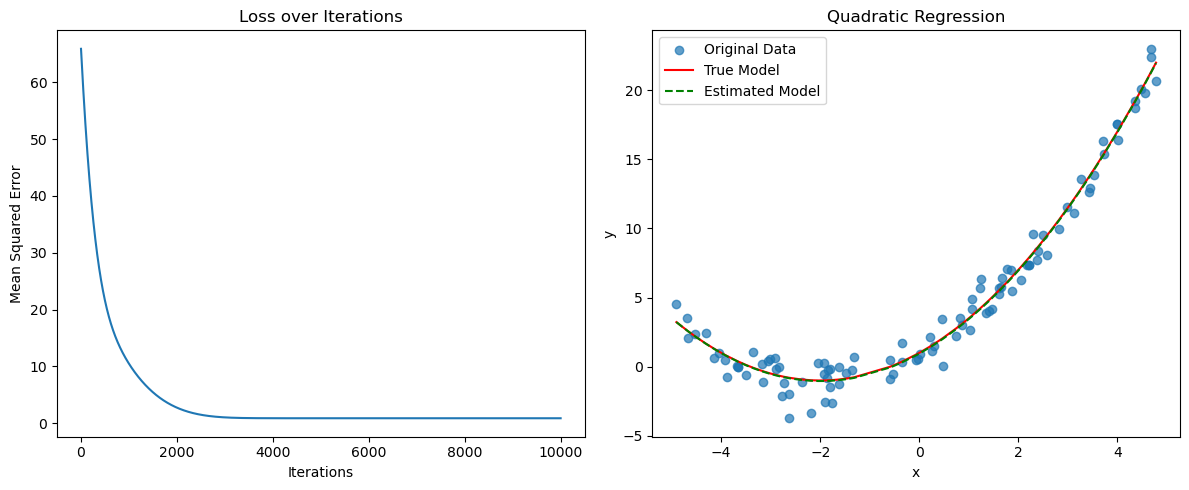

In [12]:
# Task 3: Visualization
plt.figure(figsize=(12, 5))

# Plot loss history
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')

# Plot regression results
plt.subplot(1, 2, 2)
plt.scatter(x, y, label='Original Data', alpha=0.7)

# Sort x values for smooth curve plotting
x_sorted = tf.sort(x)
y_true = quadratic_model(x_sorted, true_k1, true_k0, true_b)
y_pred = quadratic_model(x_sorted, k1, k0, b)

plt.plot(x_sorted, y_true, 'r-', label='True Model')
plt.plot(x_sorted, y_pred, 'g--', label='Estimated Model')
plt.title('Quadratic Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Print results
print("\nTrue Parameters:")
print(f"k1: {true_k1.numpy():.4f}, k0: {true_k0.numpy():.4f}, b: {true_b.numpy():.4f}")
print("\nEstimated Parameters:")
print(f"k1: {k1.numpy():.4f}, k0: {k0.numpy():.4f}, b: {b.numpy():.4f}")

plt.tight_layout()
plt.show()
